In [225]:
import pandas as pd
df = pd.read_excel("C:\Data\data16.xls")

In [226]:
df.isnull().sum()

sepal_length    9
sepal_width     9
petal_length    9
petal_width     9
species         0
dtype: int64

In [227]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2415.000000,2415.000000,2415.000000,2415.000000
mean,6.470257,3.963540,4.616911,2.189752
std,2.140522,1.022686,1.987028,1.046936
min,-10.000000,0.000000,0.000000,0.000000
25%,5.950000,3.450000,2.780000,1.460000
50%,6.700000,4.000000,5.090000,2.240000
75%,7.490000,4.580000,6.150000,2.940000
max,10.490000,7.470000,9.040000,5.440000


In [228]:
import numpy as np

In [229]:
'''Бачимо, що серед мінімальних значень, є від'ємні та 0. Очевидно, що вони є некорекними, отже, замінимо їх на NA, а потім заповнимо методом середніх'''

"Бачимо, що серед мінімальних значень, є від'ємні та 0. Очевидно, що вони є некорекними, отже, замінимо їх на NA, а потім заповнимо методом середніх"

In [230]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].map(lambda x: np.nan if x <= 0 else x)
df = df.fillna(df.mean(numeric_only = True))

In [231]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,2424.000000,2424.00000,2424.000000,2424.000000
mean,6.801044,4.07317,4.744613,2.250319
std,1.021234,0.78033,1.829200,0.979701
min,4.300000,2.00000,1.000000,0.100000
25%,6.077500,3.52000,2.990000,1.540000
50%,6.800000,4.06000,5.085000,2.250319
75%,7.490000,4.58000,6.142500,2.940000
max,10.490000,7.47000,9.040000,5.440000


In [232]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [233]:
'''Логічно буде досліджувати квіти одного виду, тому виділимо окремо дата фрейм з iris-virginica і окремо з iris-setosa'''

'Логічно буде досліджувати квіти одного виду, тому виділимо окремо дата фрейм з iris-virginica і окремо з iris-setosa'

In [234]:
df_virginica = df[df['species'] == 'Iris-virginica']
df_setosa = df[df['species'] == 'Iris-setosa']

In [235]:
df_virginica.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,800.000000,800.000000,800.000000,800.000000
mean,7.491217,4.041358,6.482188,3.027097
std,0.882682,0.760475,0.863176,0.697927
min,4.900000,2.200000,4.500000,1.400000
25%,6.801044,3.497500,5.897500,2.490000
50%,7.430000,4.010000,6.460000,2.980000
75%,8.100000,4.510000,7.050000,3.490000
max,10.490000,6.940000,9.040000,5.440000


In [236]:
df_setosa.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,800.000000,800.000000,800.000000,800.000000
mean,6.003302,4.404772,2.551909,1.361389
std,0.738364,0.745390,0.795588,0.701755
min,4.300000,2.300000,1.000000,0.100000
25%,5.450000,3.890000,1.980000,0.860000
50%,5.950000,4.330000,2.470000,1.300000
75%,6.540000,4.870000,2.990000,1.900000
max,8.810000,7.470000,4.744613,3.580000


In [237]:
'''Видалимо останній стовпець, бо він є нечисловим і потім виведемо кореляційну матрицю'''
df_virginica = df_virginica.iloc[:, :-1]
df_virginica.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.557301,0.685507,0.492842
sepal_width,0.557301,1.000000,0.484943,0.567293
petal_length,0.685507,0.484943,1.000000,0.496698
petal_width,0.492842,0.567293,0.496698,1.000000


In [238]:
'''Бачимо, що досить пряма сильна залежність між довжиною чашолистка (sepal_length) і пелюстки (petal_length). 
Всі інші можливі залежності теж є прямими та досить сильними'''

'Бачимо, що досить є пряма сильна залежність між довжиною чашолистка (sepal_length) і пелюстки (petal_length). \nВсі інші можливі залежності теж є прямими та досить сильними'

In [239]:
df_setosa = df_setosa.iloc[:, :-1]
df_setosa.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.573781,0.576798,0.591327
sepal_width,0.573781,1.000000,0.431774,0.521515
petal_length,0.576798,0.431774,1.000000,0.654116
petal_width,0.591327,0.521515,0.654116,1.000000


In [240]:
'''Бачимо, що досить є пряма сильна залежність між шириною чашолистка (petal_width) і довжиною пелюстки (petal_length). 
Всі інші можливі залежності теж є прямими та досить сильними, хіба що крім залежності між petal_length і sepal_width, вона є середньою'''

'Бачимо, що досить є пряма сильна залежність між шириною чашолистка (petal_width) і довжиною пелюстки (petal_length). \nВсі інші можливі залежності теж є прямими та досить сильними, хіба що крім залежності між petal_length і sepal_width, вона є середньою'

In [241]:
import seaborn as sns

C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\daryn\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

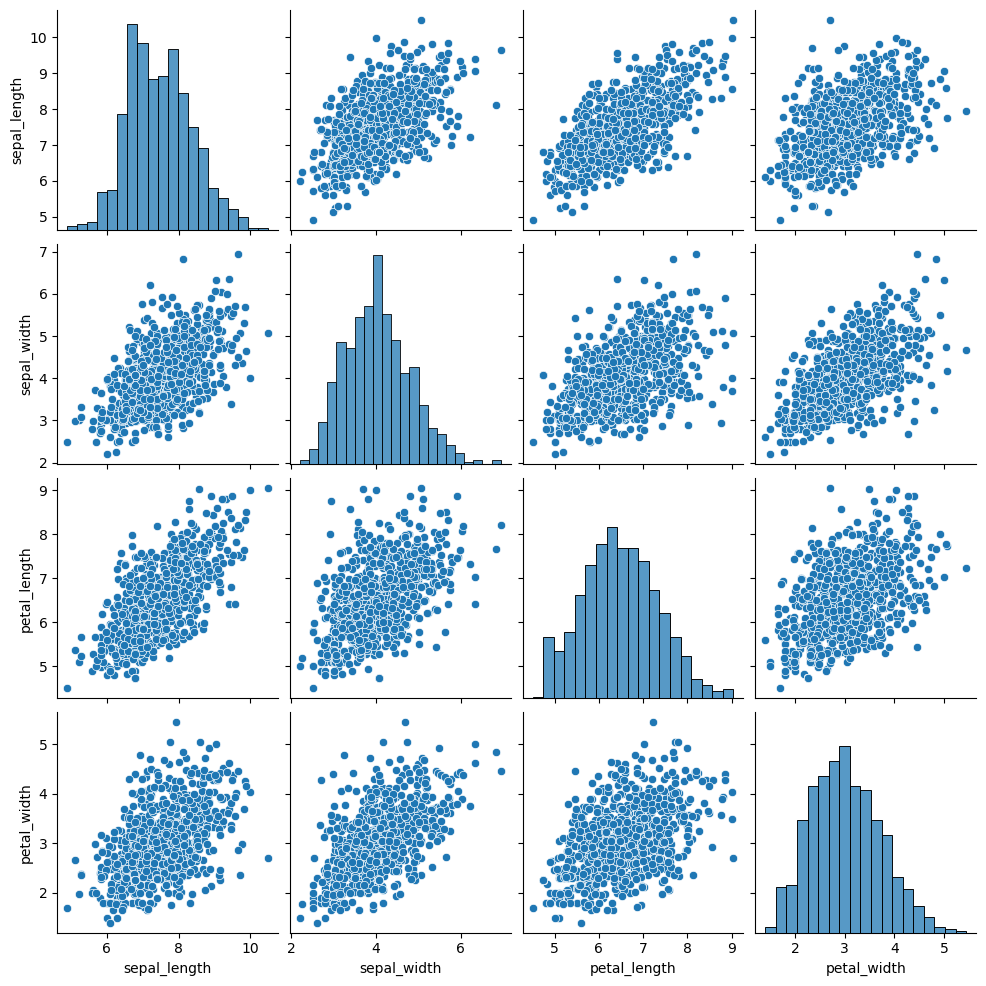

In [242]:
sns.pairplot(df_virginica)

<Axes: >

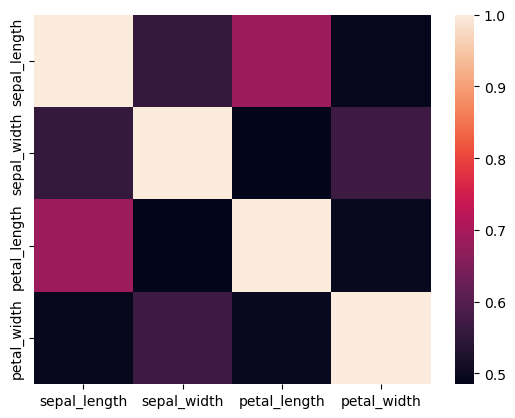

In [243]:
sns.heatmap(df_virginica.corr())

In [244]:
'''Побудуємо гістограму частот для кожної величини (sepal_length, sepal_width, petal_length, petal_width) для виду Iris-virginica. 
Так як ми досліджуємо вид розподілу, то тому і була надана перевага такій візуалізації, а також варто вказати bins, 
щоб було краще видно вид розподілу'''

'Побудуємо гістограму частот для кожної величини (sepal_length, sepal_width, petal_length, petal_width) для виду Iris-virginica. \nТак як ми досліджуємо вид розподілу, то тому і була надана перевага такій візуалізації, а також варто вказати bins, \nщоб було краще видно вид розподілу'

<Axes: ylabel='Frequency'>

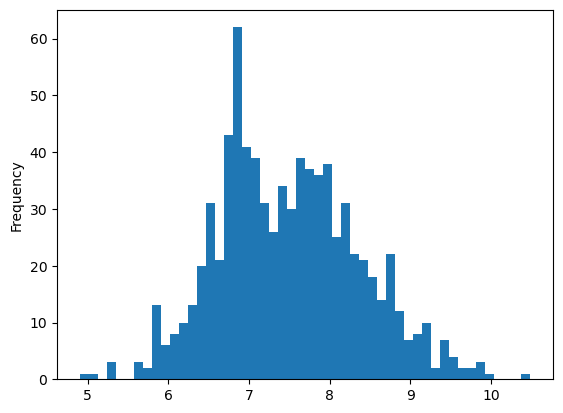

In [245]:
df_virginica['sepal_length'].plot.hist(bins = 50, label='sepal_length')

In [246]:
'''Бачимо, що візуально, це не нормальний розподіл, а скоріше бімодальний'''

'Бачимо, що візуально, це не нормальний розподіл, а скоріше бімодальний'

<Axes: ylabel='Frequency'>

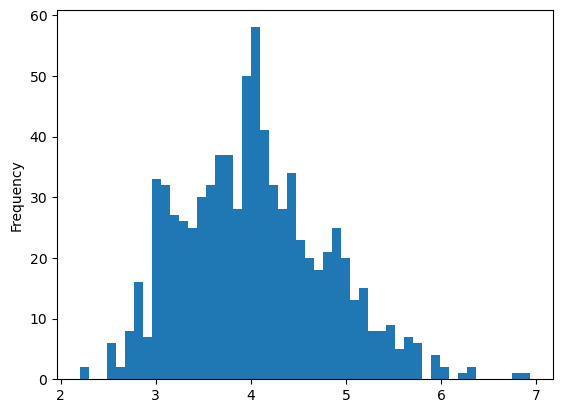

In [247]:
df_virginica['sepal_width'].plot.hist(bins = 50, label='sepal_width')

In [248]:
'''Тут також бачимо, що візуально, це не нормальний розподіл, а якийсь мультимодальний'''

'Тут також бачимо, що візуально, це не нормальний розподіл, а якийсь мультимодальний'

<Axes: ylabel='Frequency'>

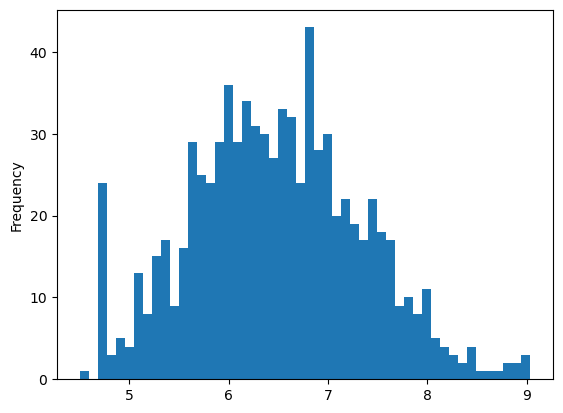

In [249]:
df_virginica['petal_length'].plot.hist(bins = 50, label='petal_length')

In [250]:
'''Тут аналогічно, це не нормальний розподіл, а якийсь мультимодальний'''

'Тут аналогічно, це не нормальний розподіл, а якийсь мультимодальний'

<Axes: ylabel='Frequency'>

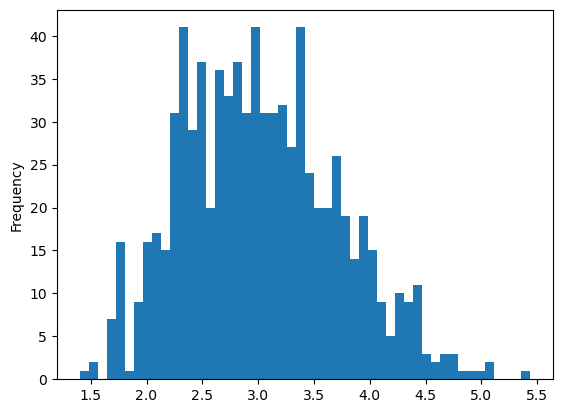

In [251]:
df_virginica['petal_width'].plot.hist(bins = 50, label='petal_width')

In [252]:
'''Тут аналогічно, це не нормальний розподіл, а якийсь мультимодальний'''

'Тут аналогічно, це не нормальний розподіл, а якийсь мультимодальний'

In [253]:
'''Тепер використаємо тест Шапіро'''

'Тепер використаємо тест Шапіро'

In [254]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [255]:
import scipy
scipy.stats.shapiro(df_virginica['sepal_length'])

ShapiroResult(statistic=0.9918012022972107, pvalue=0.00020529473840724677)

In [256]:
'''pvalue < 0.05, тому спростовуємо нульову гіпотезу про те що розподіл sepal_length нормальний. Тобто, він не є нормальним'''

'pvalue < 0.05, тому спростовуємо нульову гіпотезу про те що розподіл sepal_length нормальний'

In [257]:
scipy.stats.shapiro(df_virginica['sepal_width'])

ShapiroResult(statistic=0.986614465713501, pvalue=1.09036443518562e-06)

In [258]:
'''pvalue < 0.05, тому спростовуємо нульову гіпотезу про те що розподіл sepal_width нормальний'''

'pvalue < 0.05, тому спростовуємо нульову гіпотезу про те що розподіл sepal_width нормальний'

In [259]:
scipy.stats.shapiro(df_virginica['petal_length'])

ShapiroResult(statistic=0.9936180114746094, pvalue=0.0017583401640877128)

In [260]:
'''pvalue < 0.05, тому спростовуємо нульову гіпотезу про те що розподіл petal_length нормальний'''

'pvalue < 0.05, тому спростовуємо нульову гіпотезу про те що розподіл petal_length нормальний'

In [261]:
scipy.stats.shapiro(df_virginica['petal_width'])

ShapiroResult(statistic=0.9882659316062927, pvalue=5.101655460748589e-06)

In [262]:
'''pvalue < 0.05, тому спростовуємо нульову гіпотезу про те що розподіл petal_width нормальний'''

'pvalue < 0.05, тому спростовуємо нульову гіпотезу про те що розподіл petal_width нормальний'

In [263]:
'''Шоб розподіл став нормальним, можливо, треба прибрати аномальні значення, які вирізняються на фоні інших. Або змінити дані, взявши з кожного значення корінь кубічний, бо асиметрія спостерігається з обох боків. Перевіримо це на petal_width'''

'Шоб розподіл став нормальним, можливо, треба прибрати аномальні значення, які вирізняються на фоні інших. Або змінити дані, взявши з кожного значення корінь кубічний, бо асиметрія спостерігається з обох боків. Перевіримо це на petal_width'

In [264]:
df_virginica['petal_width']= np.cbrt(df_virginica['petal_width'])

<Axes: ylabel='Frequency'>

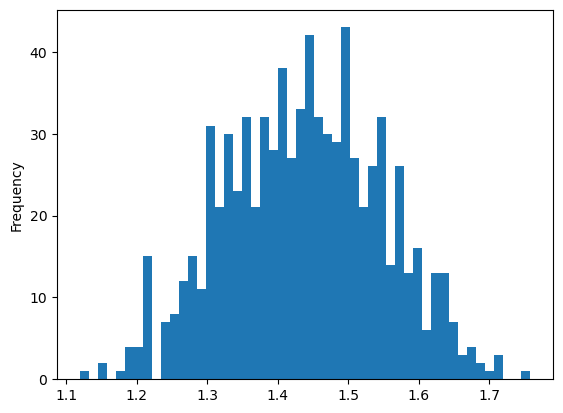

In [265]:
df_virginica['petal_width'].plot.hist(bins = 50, label='petal_width')

In [266]:
scipy.stats.shapiro(df_virginica['petal_width'])

ShapiroResult(statistic=0.9964277744293213, pvalue=0.06749115139245987)

In [267]:
'''Бачимо, що pvalue > 0.05, тому ми не можемо спростувати нульову гіпотезу про те, що розподіл petal_width є нормальним розподілом, отже, ймовірно, він є нормальним'''

'Бачимо, що pvalue > 0.05, тому ми не можемо спростувати нульову гіпотезу про те, що розподіл petal_width є нормальним розподілом, отже, ймовірно, він є нормальним'

In [268]:
'''Також я прочитала, що застосовуються такі перетворення: логарифмічне перетворення, корінь квадратний, перетворення Бокса-Кокса, Єо-Джонсона. Цікаво, а чому нам потрібно добиватися цього нормального розподілу, і чи вказані перетворення даних не спаплюжать потім прогнозні значення? Поясніть, будь ласка'''

'Також я прочитала, що застосовуються такі перетворення: логарифмічне перетворення, корінь квадратний, перетворення Бокса-Кокса, Єо-Джонсона. Цікаво, а чому нам потрібно добиватися цього нормального розподілу, і чи вказані перетворення даних не спаплюжать потім прогнозні значення? Поясніть, будь ласка'